In [2]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

In [3]:
data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735'

In [4]:
df_gene = pd.read_pickle(os.path.join(data_path, 'GENE.TABLE'))

df_tcga_corr = pd.read_pickle(os.path.join(data_path, 'TCGA.COR.TABLE'))
df_tcga_mir = pd.read_pickle(os.path.join(data_path, 'TCGA.MIR.TABLE'))

tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))

In [42]:
def split(x):
    if not pd.isna(x):
        return x.split(', ')
    else:
        return [x]

In [43]:
annotation = df_gene.annotation.apply(split)
annotation_list = annotation.tolist()

In [44]:
from itertools import chain

In [45]:
set(chain(*annotation_list))

{'Acute-phase response',
 'Adaptive immune response',
 'Adhesion',
 'Anti-inflammatory cytokines',
 'Antigen processing and presentation',
 'Autophagic vacuole formation',
 'Autophagy induction by intracellular pathogens',
 'B-cell activation',
 'B-cell differentiation',
 'B-cell proliferation',
 'B-cell receptor signaling pathway',
 'Basic cell functions',
 'CD molecules',
 'CD8-positive',
 'Cell Type specific',
 'Cell cycle arrest',
 'Cell cycle checkpoint and cell cycle arrest',
 'Chemokines and receptors',
 'Chronic inflammatory response',
 'Chronic inflammatory response to antigenic stimulus',
 'Co-Regulators of autophagy and apoptosis/cell cycle',
 'Complement pathway',
 'Cytokines and receptors',
 'Cytotoxicity',
 'DNA damage checkpoint',
 'Defense response to bacterium',
 'Defense response to fungus',
 'Defense response to tumor cell',
 'Defense response to virus',
 'G1/S transition of mitotic cell cycle',
 'G2 phase and G2/M transition',
 'Genes linking autophagosome to lysoso

In [54]:


pd.Series(list(set(chain(*df_gene.ir_category.apply(split))))).dropna()

11                Cell Cycle
25         NK Cell Functions
29        Antigen Processing
32          Pathogen Defense
39              Cytotoxicity
43          B-Cell Functions
53           TNF Superfamily
60      Macrophage Functions
83              Interleukins
93                  Adhesion
103               Senescence
117     Microglial Functions
135                      TLR
136    Transporter Functions
166               Regulation
182               Chemokines
217                Cytokines
238           Cell Functions
244         T-Cell Functions
250      Leukocyte Functions
296               Complement
dtype: object

In [4]:
# idx = tcga_tpm.T.sample(735, random_state=513).index
# tcga_tpm = tcga_tpm[idx]

In [ ]:
#  - 	0.048486	0.632331	0.684783	0.455200
#  - 	0.059242	0.594462	0.684857	0.446187
#  - 	0.112912	0.645925	0.686816	0.481884
#  - 	0.060801	0.611244	0.687555	0.453200
#  - 	0.056790	0.605689	0.689034	0.450504
#  - 	0.045381	0.583941	0.689959	0.439760
#  - 	0.089531	0.634156	0.692787	0.472158
#  - 	0.097508	0.589679	0.693471	0.460219
#  - 	0.055204	0.648428	0.698721	0.467451
#  - 	0.040215	0.650567	0.708962	0.466581


In [20]:
pairs = [('CD3E', 'IL18'),
 ('PRF1', 'F2RL1'),
 ('CD3E', 'CMKLR1'),
 ('LILRA4', 'SERPINB2'),
 ('ICOS', 'F2RL1'),
 ('PRF1', 'CMKLR1'),
 ('LILRB1', 'CMKLR1'),
 ('SERPINB2', 'CLEC4C'),
 ('CCR4', 'F2RL1'),
 ('PIK3CD', 'TOLLIP')]

In [23]:
for p in pairs:
    x,y = p
    c = df_tcga_corr.loc[x][y]
    print(c)

0.38654848798541835
0.10808066136127928
0.4775852441863888
-0.06896668143444559
0.10937359346177314
0.5219729450628067
0.7584305652638224
0.06306738316397936
0.17521521136469373
-0.017958851169175727


In [26]:
adj = abs(df_tcga_corr.values) > 0.2

In [27]:
paires = np.argwhere(abs(df_tcga_corr.values) > 0.2)

# groupby index
tmp = np.unique(paires[:, 0], return_index=True)
neighbors = np.split(paires[:,1], tmp[1])[1:]
indices = tmp[0]

In [34]:
neighbors[2].shape

(189,)

In [5]:
gc = df_gene.gene_class.unique()
gc_dict = {'HK':'tab:orange', 'CT Antigen':'tab:blue',
           'Immune Response':'tab:green', 
           'Immune Response - Cell Type specific':'tab:purple',
           'Immune Response - Checkpoint':'tab:pink', 
           'Immune Response - Cell Type specific / Checkpoint':'tab:red'}

## Most correlated genes (MCG)

/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


UMAP(metric='precomputed', random_state=42, verbose=1)
Tue Sep 12 20:05:08 2023 Construct fuzzy simplicial set
Tue Sep 12 20:05:08 2023 Finding Nearest Neighbors
Tue Sep 12 20:05:11 2023 Finished Nearest Neighbor Search
Tue Sep 12 20:05:13 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Sep 12 20:05:16 2023 Finished embedding


0.0

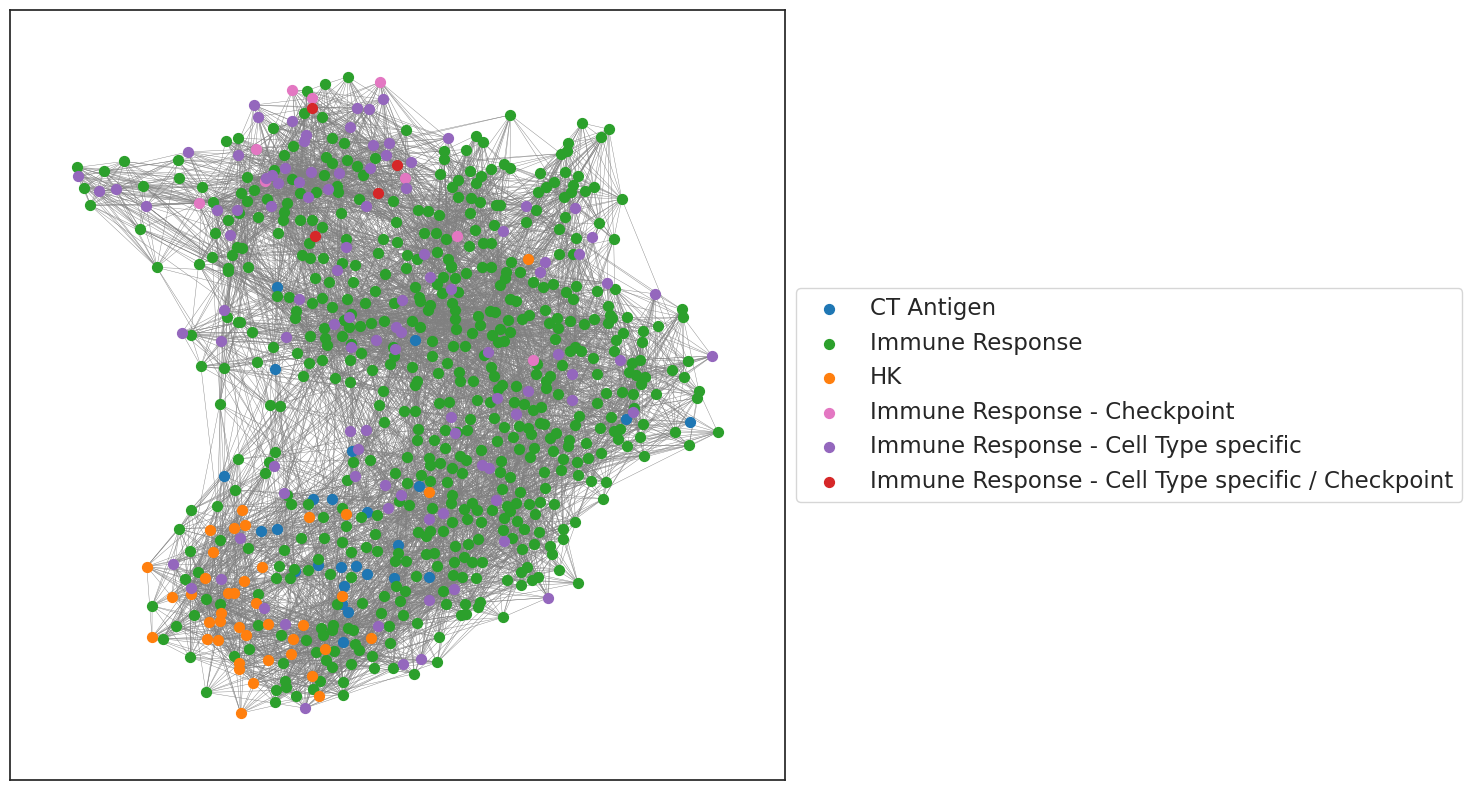

In [6]:
dist_cor = 1-abs(df_tcga_corr.values)
dis_mir = 1-np.log(df_tcga_mir+1).values

np.fill_diagonal(dist_cor, 0)
np.fill_diagonal(dis_mir, 0)

x = dist_cor #tcga_tpm.T.values
node_names = tcga_tpm.columns

mp = UMAP(n_neighbors=15,  metric='precomputed', verbose=1, random_state=42)
mp = mp.fit(x)
x2d = mp.transform(x)

coo_graph = mp.graph_.tocoo()
edge_df = pd.DataFrame(
    np.vstack([coo_graph.row, coo_graph.col, coo_graph.data]).T,
    columns=("source", "target", "weight"),
)
edge_df["source"] = edge_df.source.astype(np.int32)
edge_df["target"] = edge_df.target.astype(np.int32)

import networkx as nx
fig, ax = plt.subplots(figsize = (10, 10))
A = mp.graph_.toarray()

G = nx.from_numpy_array(np.matrix(A))
layout = nx.layout.spring_layout(G,seed=123)


dfs = pd.DataFrame(mp.embedding_, columns = ['x','y'], index=tcga_tpm.columns)
s = df_gene.gene_class.unique()
c = df_gene.gene_class.map(dict(zip(s, range(len(s))))).to_frame(name = 'c')
dfs = dfs.join(c)
dfs['gene_class'] = dfs.index.map(df_gene.gene_class)
dfs['gene_color'] = dfs.gene_class.map(gc_dict)
dfs.index.name= 'gene_name'
dfs = dfs.reset_index()


colormap = dfs.groupby(['gene_color', 'gene_class']).apply(lambda x: x.index.tolist()).reset_index()


#nx.draw(G, layout, ax = ax, node_size = 50, edge_color = 'gray', width = 0.3,)

for i in range(len(colormap)):
    ts = colormap.iloc[i]
    nx.draw_networkx_nodes(G, pos=layout, nodelist=ts[0],  ax = ax, node_size = 50, 
             node_color=ts.gene_color, label=ts.gene_class)
    
nx.draw_networkx_edges(G, pos=layout,ax = ax, edge_color = 'gray', width = 0.3, )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


dfa = pd.DataFrame(A, columns = df_tcga_corr.columns, index=df_tcga_corr.columns)
dfa['PIK3CD'].loc['TOLLIP']

<Axes: >

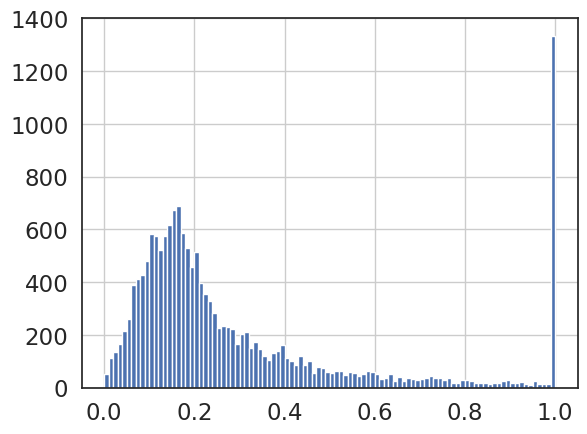

In [7]:
edge_df.sort_values('weight').weight.hist(bins=100)

In [8]:
G1 = np.matrix(A)

In [9]:
dfa['PIK3CD'].loc['TOLLIP']

0.0

## Least correlated genes (LCG)

UMAP(metric='precomputed', random_state=42, verbose=1)
Tue Sep 12 20:05:22 2023 Construct fuzzy simplicial set
Tue Sep 12 20:05:22 2023 Finding Nearest Neighbors
Tue Sep 12 20:05:22 2023 Finished Nearest Neighbor Search
Tue Sep 12 20:05:22 2023 Construct embedding


/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


Epochs completed:   0%|            0/500 [00:00]

Tue Sep 12 20:05:25 2023 Finished embedding


0.0

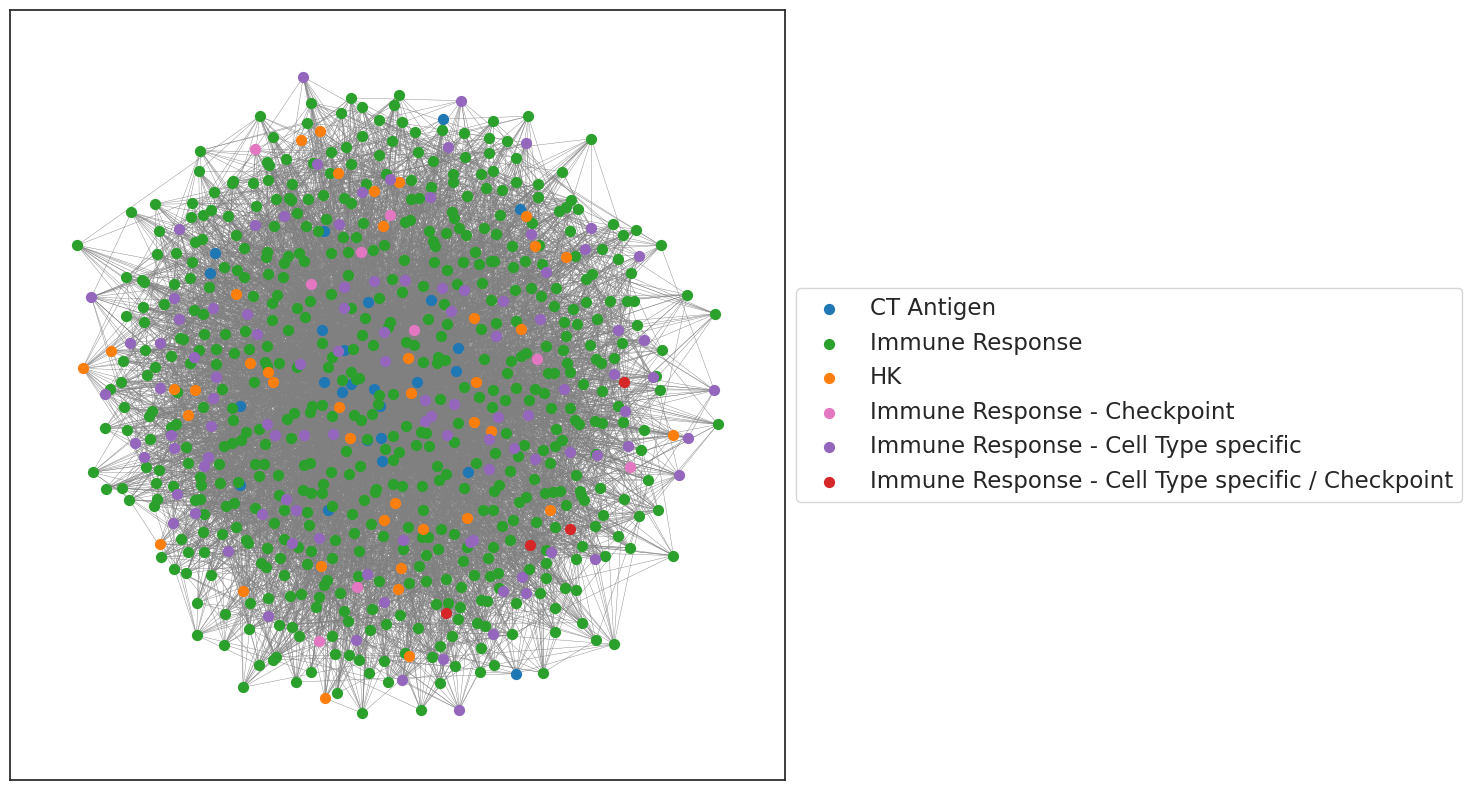

In [10]:
dist_cor = abs(df_tcga_corr.values)
#dis_mir = 1-np.log(df_tcga_mir+1).values

np.fill_diagonal(dist_cor, 0)
#np.fill_diagonal(dis_mir, 0)

x = dist_cor #tcga_tpm.T.values
node_names = tcga_tpm.columns

mp = UMAP(n_neighbors=15,  metric='precomputed',  verbose=1, random_state=42)
mp = mp.fit(x)
x2d = mp.transform(x)

coo_graph = mp.graph_.tocoo()
edge_df = pd.DataFrame(
    np.vstack([coo_graph.row, coo_graph.col, coo_graph.data]).T,
    columns=("source", "target", "weight"),
)
edge_df["source"] = edge_df.source.astype(np.int32)
edge_df["target"] = edge_df.target.astype(np.int32)

import networkx as nx
fig, ax = plt.subplots(figsize = (10, 10))
A = mp.graph_.toarray()

G = nx.from_numpy_array(np.matrix(A))
layout = nx.layout.spring_layout(G,seed=123)


dfs = pd.DataFrame(mp.embedding_, columns = ['x','y'], index=tcga_tpm.columns)
s = df_gene.gene_class.unique()
c = df_gene.gene_class.map(dict(zip(s, range(len(s))))).to_frame(name = 'c')
dfs = dfs.join(c)
dfs['gene_class'] = dfs.index.map(df_gene.gene_class)
dfs['gene_color'] = dfs.gene_class.map(gc_dict)
dfs.index.name= 'gene_name'
dfs = dfs.reset_index()


colormap = dfs.groupby(['gene_color', 'gene_class']).apply(lambda x: x.index.tolist()).reset_index()


#nx.draw(G, layout, ax = ax, node_size = 50, edge_color = 'gray', width = 0.3,)

for i in range(len(colormap)):
    ts = colormap.iloc[i]
    nx.draw_networkx_nodes(G, pos=layout, nodelist=ts[0],  ax = ax, node_size = 50, 
             node_color=ts.gene_color, label=ts.gene_class)
    
nx.draw_networkx_edges(G, pos=layout,ax = ax, edge_color = 'gray', width = 0.3, )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

dfa = pd.DataFrame(A, columns = df_tcga_corr.columns, index=df_tcga_corr.columns)
dfa['PIK3CD'].loc['TOLLIP']

<Axes: >

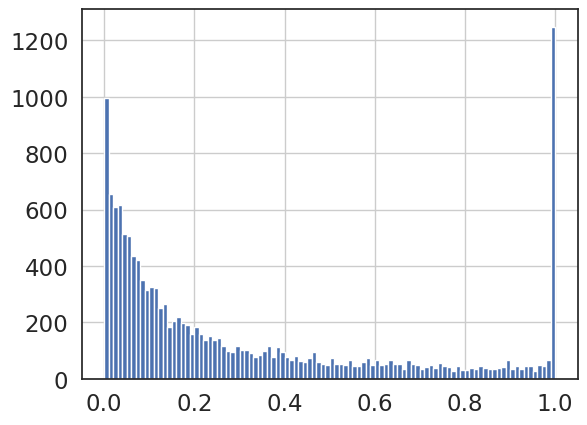

In [11]:
edge_df.sort_values('weight').weight.hist(bins=100)

In [15]:
edge_df.sort_values('weight')

,source,target,weight
12614,635,19,4.486255e-08
442,19,635,4.486255e-08
8279,427,351,1.717343e-07
6820,351,427,1.717343e-07
5971,326,427,2.019311e-07
...,...,...,...
9582,493,356,1.000000e+00
11541,581,262,1.000000e+00
4612,259,255,1.000000e+00
11546,581,530,1.000000e+00


In [16]:
G2 = np.matrix(A)

In [18]:
df_tcga_corr.iloc[553].iloc[483]

-0.00087719475074963

In [79]:
df_tcga_corr.iloc[59].iloc[574]

-0.3337510093837547

In [81]:
df_tcga_corr['PIK3CD'].loc['TOLLIP']

-0.017958851169175727

In [89]:
from scipy.spatial.distance import squareform

array([ 0.24899887,  0.12637125,  0.26889957, ..., -0.10303562,
        0.44132007,  0.20391583])

<Axes: >

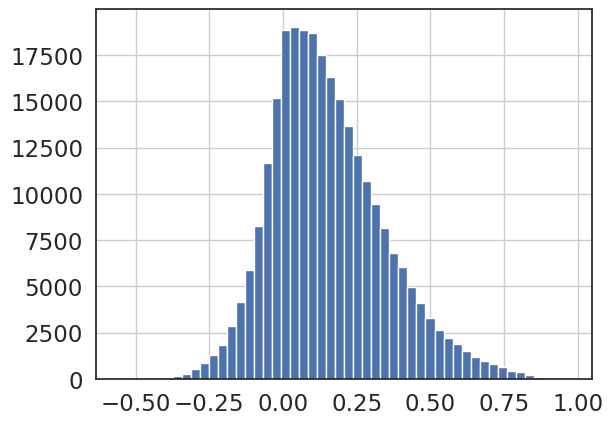

In [93]:
pd.Series(squareform(df_tcga_corr.values)).hist(bins=50)

In [52]:
edge_df.sort_values('weight')

,source,target,weight
17220,434,326,4.636359e-12
12233,326,434,4.636359e-12
890,19,434,1.338204e-11
17214,434,19,1.338204e-11
17222,434,363,1.636244e-11
...,...,...,...
8501,232,205,1.000000e+00
5374,151,123,1.000000e+00
7118,195,59,1.000000e+00
15173,379,51,1.000000e+00


In [12]:
# CD3E - IL18	0.048486	0.632331	0.684783	0.455200
# PRF1 - F2RL1	0.059242	0.594462	0.684857	0.446187
# CD3E - CMKLR1	0.112912	0.645925	0.686816	0.481884
# LILRA4 - SERPINB2	0.060801	0.611244	0.687555	0.453200
# ICOS - F2RL1	0.056790	0.605689	0.689034	0.450504
# PRF1 - CMKLR1	0.045381	0.583941	0.689959	0.439760
# LILRB1 - CMKLR1	0.089531	0.634156	0.692787	0.472158
# CLEC4C - SERPINB2	0.097508	0.589679	0.693471	0.460219
# CCR4 - F2RL1	0.055204	0.648428	0.698721	0.467451
# PIK3CD - TOLLIP	0.040215	0.650567	0.708962	0.466581

dfa = pd.DataFrame(A, columns = df_tcga_corr.columns, index=df_tcga_corr.columns)
dfa['PIK3CD'].loc['TOLLIP']

0.0